In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as st

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [9]:
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

results_prcp = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()

df = pd.DataFrame(results_prcp, columns=['date', 'prcp'])

df['To_Date'] = pd.to_datetime(df['date'])

# Calculate the date 1 year ago from the last data point in the database

date_1yr_ago = df.To_Date.max() - pd.DateOffset(months=12) 

# Save the query results as a Pandas DataFrame

df_filtered = df.loc[df['To_Date'] >= date_1yr_ago]

# Sort the dataframe by date

df_filtered = df_filtered.sort_values(by=['To_Date'])

df_filtered



,date,prcp,To_Date
2229,2016-08-23,0.70,2016-08-23
2223,2016-08-23,0.00,2016-08-23
2224,2016-08-23,0.15,2016-08-23
2228,2016-08-23,1.79,2016-08-23
2226,2016-08-23,NaN,2016-08-23
...,...,...,...
4,2017-08-22,0.00,2017-08-22
3,2017-08-23,0.45,2017-08-23
2,2017-08-23,0.08,2017-08-23
1,2017-08-23,0.00,2017-08-23


<IPython.core.display.Javascript object>


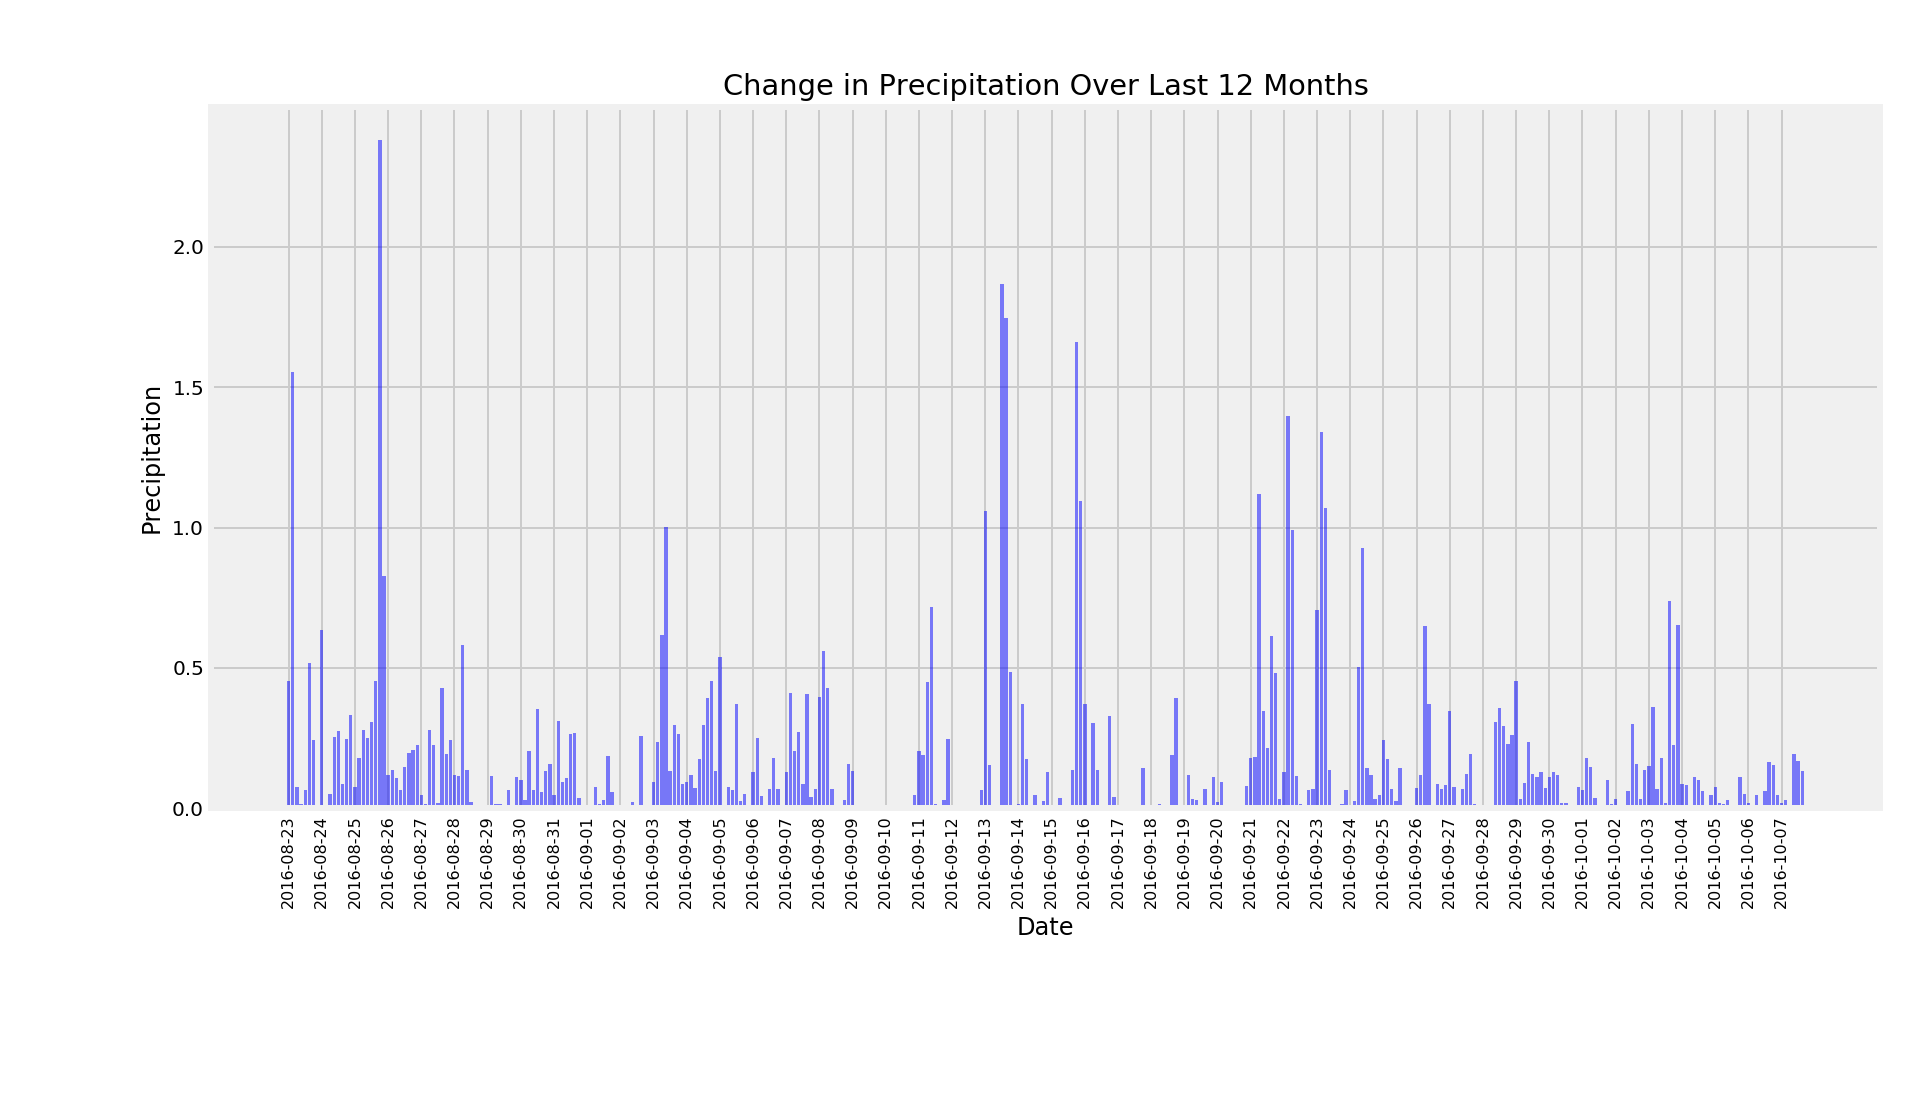

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
%matplotlib notebook

summary_table = df_filtered.groupby(['Date']).mean()

summary_table = summary_table.reset_index()

x_axis = summary_table['Date'].tolist()
y_axis = summary_table['Precipitation'].tolist()

plt.bar(np.arange(len(x_axis)), y_axis, align='center', color='blue', alpha=0.5)
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=8, rotation='vertical')
plt.locator_params(axis='x', nbins=50)
plt.title('Change in Precipitation Over Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.grid(True)
plt.show()
plt.tight_layout()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

summary_stats = df_filtered.groupby('Date').agg(
    mean_precipitation = pd.NamedAgg(column='Precipitation', aggfunc='mean'),
    median_precipitation = pd.NamedAgg(column='Precipitation', aggfunc='median'),
    max_precipitation = pd.NamedAgg(column='Precipitation', aggfunc='max'),
    min_precipitation = pd.NamedAgg(column='Precipitation', aggfunc='min'),
    variance_precipitation = pd.NamedAgg(column='Precipitation', aggfunc='var'),
    standard_deviation_precipitation = pd.NamedAgg(column='Precipitation', aggfunc=np.std),
    SEM_precipitation = pd.NamedAgg(column='Precipitation', aggfunc=st.sem))

summary_stats


/Users/richagautam/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/richagautam/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/richagautam/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean_precipitation,median_precipitation,max_precipitation,min_precipitation,variance_precipitation,standard_deviation_precipitation,SEM_precipitation
Date,,,,,,,
2016-08-23,0.451667,0.100,1.79,0.00,0.499097,0.706468,NaN
2016-08-24,1.555000,1.800,2.28,0.08,0.706510,0.840541,NaN
2016-08-25,0.077143,0.080,0.21,0.00,0.005157,0.071813,0.027143
2016-08-26,0.016667,0.015,0.04,0.00,0.000267,0.016330,0.006667
2016-08-27,0.064000,0.020,0.18,0.00,0.006680,0.081731,NaN
...,...,...,...,...,...,...,...
2017-08-19,0.030000,0.000,0.09,0.00,0.002700,0.051962,NaN
2017-08-20,0.005000,0.005,0.01,0.00,0.000050,0.007071,NaN
2017-08-21,0.193333,0.020,0.56,0.00,0.100933,0.317700,NaN


In [21]:
# Design a query to show how many stations are available in this dataset?

results_station = session.query(Measurement).group_by(Measurement.station).count()
results_station

9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

results_station_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

results_station_active


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

results_summary_stats = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
group_by(Measurement.station).all()

results_summary_stats

[('USC00511918', 53.0, 87.0, 71.61596766043456),
 ('USC00513117', 59.0, 85.0, 72.68918420081211),
 ('USC00514830', 58.0, 85.0, 74.8732970027248),
 ('USC00516128', 58.0, 84.0, 70.91500765696784),
 ('USC00517948', 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 58.0, 83.0, 72.72407045009784),
 ('USC00519281', 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 56.0, 87.0, 74.55323054331865),
 ('USC00519523', 56.0, 85.0, 74.5436493068565)]

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station

results_station_active = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_station = results_station_active[0][0]

## TAs, I tried to filter by date in the query, failed, so did it in the dataframe ##

results_station_most_active = session.query(Measurement.date, Measurement.tobs).\
filter_by(station = most_active_station).\
order_by(Measurement.date.desc()).all()

results_station_most_active = pd.DataFrame(results_station_most_active, columns=['Date', 'Temperature'])

results_station_most_active['To_Date'] = pd.to_datetime(results_station_most_active['Date'])

# Calculate the date 1 year ago from the last data point in the database

date_1yr_ago = results_station_most_active.To_Date.max() - pd.DateOffset(months=12) 

results_station_most_active_filtered = results_station_most_active.loc[results_station_most_active['To_Date'] >= date_1yr_ago]

# Sort the dataframe by date

results_station_most_active_filtered = results_station_most_active_filtered.sort_values(by=['To_Date'])

results_station_most_active_filtered


,Date,Temperature,To_Date
356,2016-08-18,80.0,2016-08-18
355,2016-08-19,79.0,2016-08-19
354,2016-08-20,81.0,2016-08-20
353,2016-08-21,79.0,2016-08-21
352,2016-08-22,78.0,2016-08-22
...,...,...,...
4,2017-08-14,77.0,2017-08-14
3,2017-08-15,77.0,2017-08-15
2,2017-08-16,76.0,2017-08-16
1,2017-08-17,76.0,2017-08-17


<IPython.core.display.Javascript object>


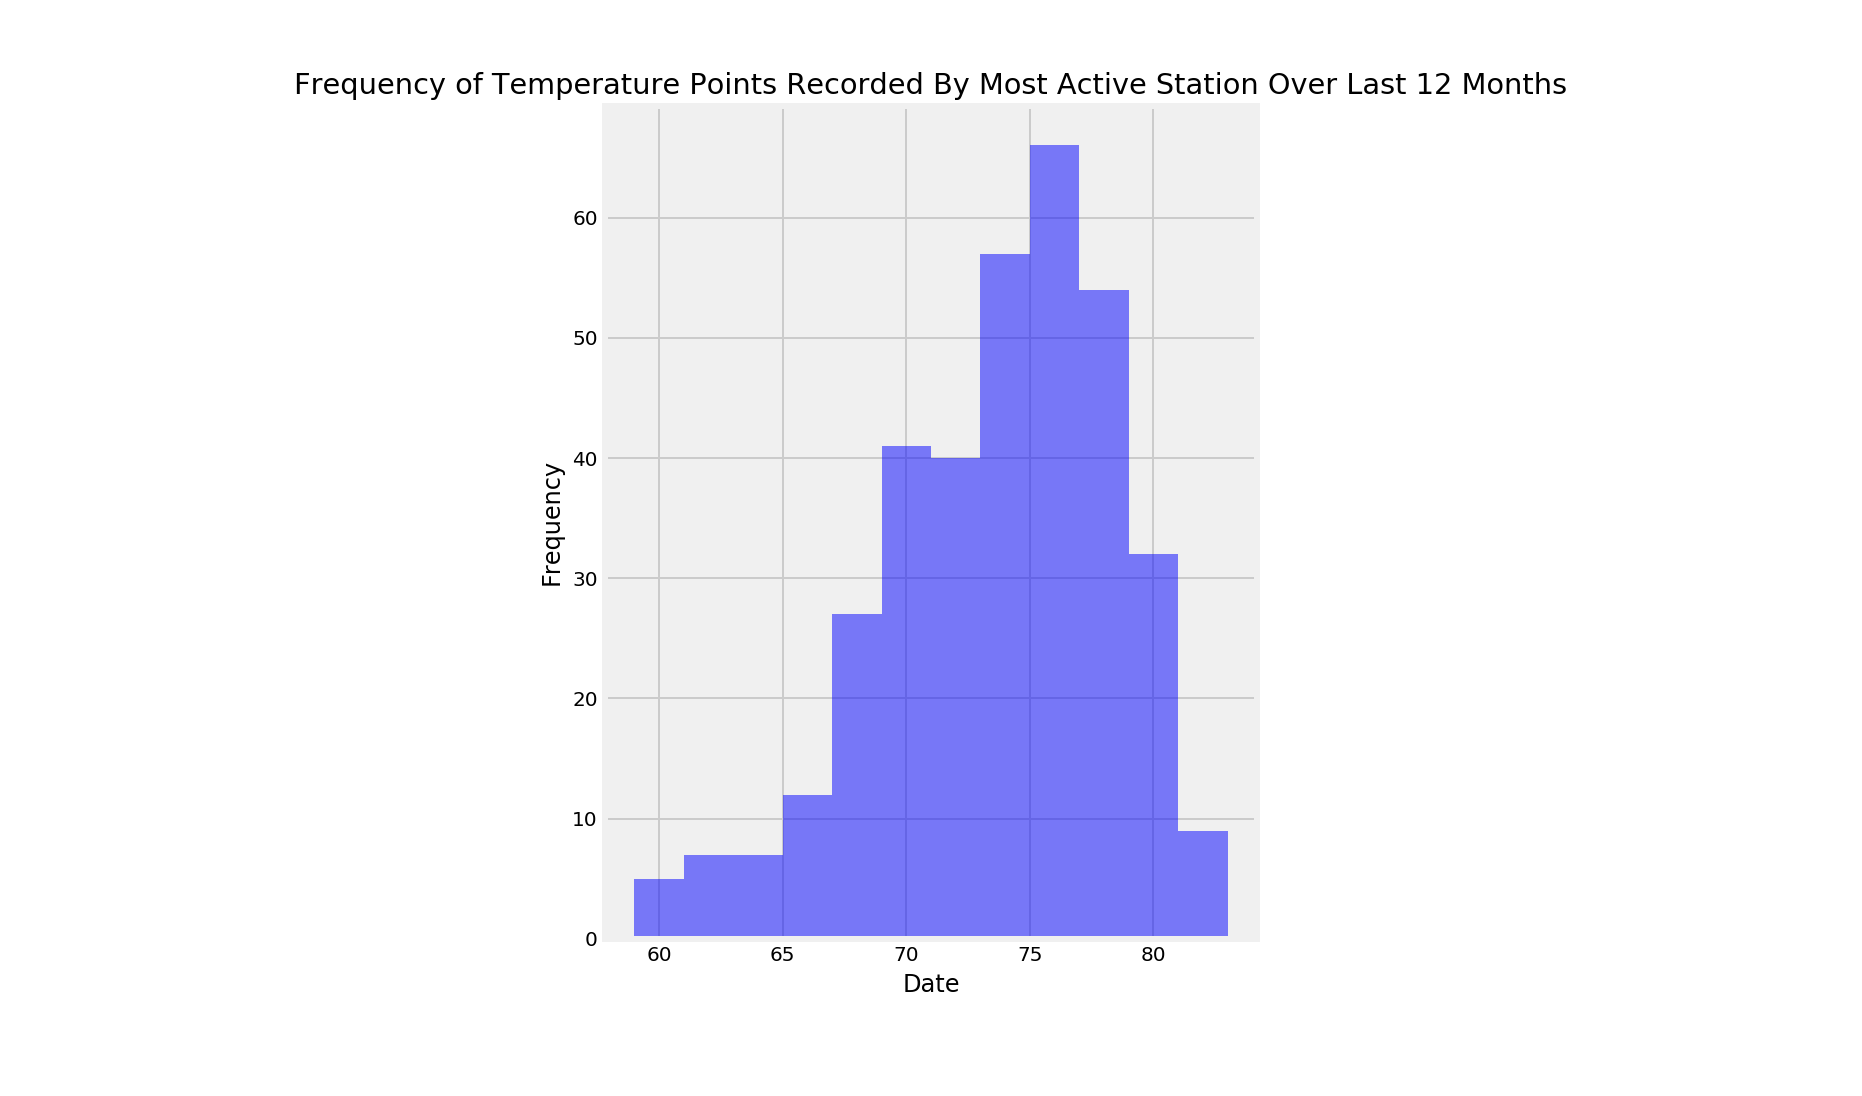

In [19]:
# Plot the results as a histogram

%matplotlib notebook

x_axis = results_station_most_active_filtered['Date'].tolist()
y_axis = results_station_most_active_filtered['Temperature'].tolist()

plt.hist(y_axis, bins=12, color='blue', alpha=0.5)
# plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=8, rotation='vertical')
# plt.locator_params(axis='x', nbins=50)
plt.title('Frequency of Temperature Points Recorded By Most Active Station Over Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()
plt.tight_layout()




## Bonus Challenge Assignment

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVG, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
